In [17]:
# Note, I'm not finished with assignment, see references for more details.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from statistics import mode, multimode
from mlxtend.plotting import plot_decision_regions

In [18]:
#!pip install mlxtend

In [19]:
# Exercise 1
# 1. Plot
# Read the file
df = pd.read_csv('A1_datasets/A1_datasets/microchips.csv')
df = df.astype('float')

In [20]:
# The first row had values but were seen as names for the columns.
# I added a new row with A, B, C so that the values could be used for prediction.
df.columns = ['A', 'B', 'C']
df.loc[-1] = [0.051267, 0.69956, 1]  
df.index = df.index + 1 
df.sort_index(inplace=True) 
fail0 = df[(df.C==0)]
x0 = fail0[['A']] 
y0 = fail0[["B"]]
ok1 = df[(df.C==1)]
x1 = ok1[['A']] 
y1 = ok1[["B"]]

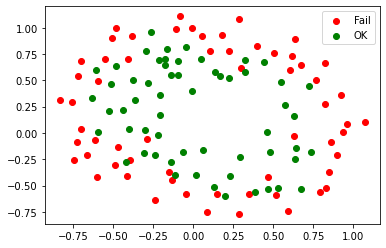

In [21]:
# Plotting datapoints
plt.scatter(x0, y0, color='red')
plt.scatter(x1,y1, color='green')
plt.legend(["Fail" , "OK"])
plt.show()

In [22]:
# 2. Implement and use knn
# Points that were given in exercise
microchip1 = np.array([
-0.3, 1.0])
microchip2 = np.array([-0.5, -0.1])
microchip3 = np.array([0.6, 0])

In [23]:
X = df[['A', 'B']]
y = df['C']
y.size

118

In [24]:
# Finding euclidean distances, i.e. using euclidean formula to
# find vector length so that we can find closest neighbours.
distances1 = np.linalg.norm(X - microchip1, axis=1)
distances2 = np.linalg.norm(X - microchip2, axis=1)
distances3 = np.linalg.norm(X - microchip3, axis=1)

In [25]:
# Find knn
# We use argsort to find the points that are closest to our new point.
# nearest_neighbors_rings represent what values these points have.
# For classification, the neighbouring points that occur the most
# will give their value to the new point, this is done with the mode function.

lista = [1, 3, 5, 7]
for k in lista:
    print(f'k = {k}')
    nearest_neighbor_ids1 = distances1.argsort()[:k]
    nearest_neighbor_ids2 = distances2.argsort()[:k]
    nearest_neighbor_ids3 = distances3.argsort()[:k]
    print(nearest_neighbor_ids1)
    nearest_neighbor_rings1 = y[nearest_neighbor_ids1]
    nearest_neighbor_rings2 = y[nearest_neighbor_ids2]
    nearest_neighbor_rings3 = y[nearest_neighbor_ids3]

    if mode(nearest_neighbor_rings1) == 0:
        print(f'chip1: [-0.3, 1.0]: ==> Fail')
    elif mode(nearest_neighbor_rings1) == 1:
        print(f'chip1: [-0.3, 1.0]: ==> OK')
    if mode(nearest_neighbor_rings2) == 0:
        print(f'chip2: [-0.5, -0.1]: ==> Fail')
    elif mode(nearest_neighbor_rings2) == 1:
        print(f'chip2: [-0.5, -0.1]: ==> OK')
    if mode(nearest_neighbor_rings3) == 0:
        print(f'chip3: [0.6, 0.0]: ==> Fail')
    elif mode(nearest_neighbor_rings3) == 1:
        print(f'chip3: [0.6, 0.0]: ==> OK')

k = 1
[30]
chip1: [-0.3, 1.0]: ==> OK
chip2: [-0.5, -0.1]: ==> Fail
chip3: [0.6, 0.0]: ==> Fail
k = 3
[ 30  89 115]
chip1: [-0.3, 1.0]: ==> Fail
chip2: [-0.5, -0.1]: ==> Fail
chip3: [0.6, 0.0]: ==> OK
k = 5
[ 30  89 115  94  29]
chip1: [-0.3, 1.0]: ==> Fail
chip2: [-0.5, -0.1]: ==> OK
chip3: [0.6, 0.0]: ==> OK
k = 7
[ 30  89 115  94  29  90  31]
chip1: [-0.3, 1.0]: ==> Fail
chip2: [-0.5, -0.1]: ==> Fail
chip3: [0.6, 0.0]: ==> OK


In [26]:
# Lista contains the predicted answer with x neighbors
lista = []
k = 3
for index, row in df.iterrows():
    distances1 = np.linalg.norm(X - row[['A', 'B']], axis=1)
    nearest_neighbor_ids1 = distances1.argsort()[:k]
    nearest_neighbor_rings1 = y[nearest_neighbor_ids1]
    nearest_neighbor_rings1 = mode(nearest_neighbor_rings1)
    lista.append(nearest_neighbor_rings1)
lista

[1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0]

In [27]:
# X and y as numpy arrays.
X_ar = np.array(X)
y_ar = np.array(y)
y_ar = y_ar.astype('int')
y_ar.size

118

In [28]:
# Lista to array and int.
arr = np.array(lista)
arr = arr.astype('int')
arr

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1])

In [29]:
h = 0.8
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00'])
x_min, x_max = X_ar[:, 0].min() - 1, X_ar[:, 0].max() + 1
y_min, y_max = X_ar[:, 1].min() - 1, X_ar[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
np.arange(y_min, y_max, h))

In [30]:
arr = arr.reshape(xx.shape)

ValueError: cannot reshape array of size 118 into shape (5,5)

In [ ]:
plt.figure()
plt.pcolormesh(xx, yy, arr, cmap=cmap_light)
# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("3-Class classification (k = %i)" % (n_neighbors))
plt.show()

In [ ]:
arr.shape

In [ ]:
#arr.size()

In [ ]:
arr = arr.reshape(xx.shape)

In [ ]:

#plt.figure()
#plt.pcolormesh(xx, yy, arr, cmap=cmap_light)
#arr.shape()